In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [72]:
import numpy as np
import pandas as pd

from scipy import mean
from scipy import stats

In [73]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [44]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
first_row1 = session.query(Measurement).first()
first_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x164d42a0848>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Earliest Date
earliest = session.query(Measurement.date).order_by(Measurement.date).first()

# Latest Date
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The earlist date in Measurement DB is {earliest} and the latest date is {latest}')

The earlist date in Measurement DB is ('2010-01-01',) and the latest date is ('2017-08-23',)


In [51]:
# Calculate the date 1 year ago from the last data point in the database

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [52]:
# Perform a query to retrieve the data and precipitation scores

prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_data)

# Sort the dataframe by date
df = df.sort_values(by=['date'])

df = df.dropna()

df = df.set_index('date')

df


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


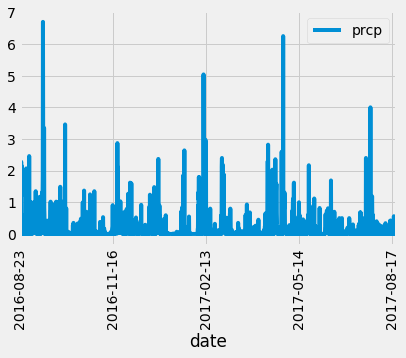

In [96]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the Results in a Matplotlib bar chart

df.plot(rot=90)

plt.show()

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [55]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x164d4169788>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0}

In [97]:
# Design a query to show how many stations are available in this dataset?
station_total = session.query(Station.station).count()
station_count = session.query(Measurement.station.distinct()).count()
station_names = session.query(Station.station.distinct()).all()
print(f'There are {station_count} unique stations')
print(f'There are {station_total} total stations')
station_names

There are 9 unique stations
There are 9 total stations


[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [57]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_counts = session.query(Measurement.station, func.count()).\
    group_by(Measurement.station).\
    order_by(func.count().desc()).all()


station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
inspector = inspect(engine)

# Get a list of column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [59]:
# Get a list of column names and types
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [60]:
#join tables get name of station with most observations

station_id = 'USC00519281'

station_name = session.query(Station.name.distinct()).\
            filter(Station.station == Measurement.station).\
            filter(Station.station == station_id).all()

station_name


[('WAIHEE 837.5, HI US')]

In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station


temps = [func.avg(Measurement.tobs),
         func.min(Measurement.tobs),
         func.max(Measurement.tobs)]
        
station_1 = session.query(*temps).\
        filter(Measurement.station == station_id).all()

print(f'Station {station_id} recorded the following: Avg, Low and High temperatures {station_1}')





Station USC00519281 recorded the following: Avg, Low and High temperatures [(71.66378066378067, 54.0, 85.0)]


In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


station_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == station_id).\
    filter(Measurement.date >= query_date).all()


In [63]:
df_temp = pd.DataFrame(station_temp)


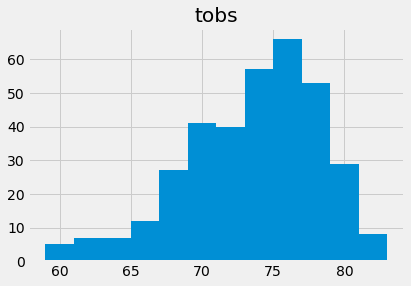

In [64]:


title= 'Station USC00519281: Past 12 months of Temperature'
plot = df_temp.hist(column='tobs', bins=12)



## Bonus Challenge Assignment

In [65]:
#Identify the average temperature in June at all stations across all available years in the dataset. 
#Do the same for December temperature.
from sqlalchemy import extract

        
yearly_station_june = session.query(Measurement.station, func.avg(Measurement.tobs).label('Avg Temp'),
                                    extract('year', Measurement.date)).\
                                    filter(extract('month', Measurement.date) == 6).\
                                    group_by(Measurement.station).all()


yearly_station_june

[('USC00511918', 74.13939393939394, 2010),
 ('USC00513117', 74.05084745762711, 2010),
 ('USC00514830', 76.00537634408602, 2010),
 ('USC00516128', 71.9372197309417, 2010),
 ('USC00517948', 76.6554054054054, 2010),
 ('USC00518838', 73.39473684210526, 2010),
 ('USC00519281', 73.27118644067797, 2010),
 ('USC00519397', 77.55932203389831, 2010),
 ('USC00519523', 76.66810344827586, 2010)]

In [28]:
#Identify the average temperature in December at all stations across all available years in the dataset. 
from sqlalchemy import extract

        
yearly_station_dec = session.query(Measurement.station, func.avg(Measurement.tobs).label('Avg Temp'),
                                    extract('year', Measurement.date)).\
                                    filter(extract('month', Measurement.date) == 12).\
                                    group_by(Measurement.station).all()


yearly_station_dec


[('USC00511918', 69.6842105263158, 2010),
 ('USC00513117', 71.06944444444444, 2010),
 ('USC00514830', 73.2247191011236, 2010),
 ('USC00516128', 69.29126213592232, 2010),
 ('USC00517948', 71.8348623853211, 2010),
 ('USC00518838', 72.42105263157895, 2010),
 ('USC00519281', 69.90322580645162, 2010),
 ('USC00519397', 71.10952380952381, 2010),
 ('USC00519523', 72.43333333333334, 2010)]

In [74]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why?

june_temps = [int(temp[1]) for temp in yearly_station_june]
dec_temps = [int(temp[1]) for temp in yearly_station_dec]



In [76]:
avg_june = mean(june_temps)
avg_dec = mean(dec_temps)

print(f'Average June temperature in Hawaii: {avg_june}')
print(f'Average December temperature in Hawaii: {avg_dec}')

Average June temperature in Hawaii: 74.44444444444444
Average December temperature in Hawaii: 70.77777777777777


In [77]:
stats.ttest_ind(june_temps, dec_temps)

Ttest_indResult(statistic=4.5011626405051315, pvalue=0.00036266733676799744)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin,tavg,tmax = calc_temps('2011-02-28', '2011-03-5')[0]
print(tmin,tavg,tmax)


61.0 71.50833333333334 79.0


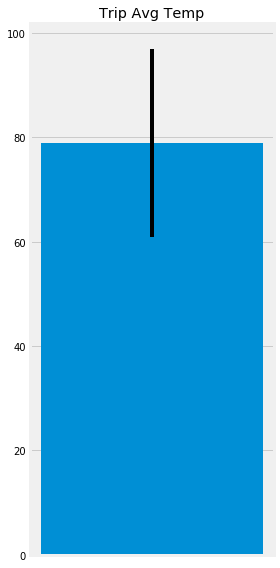

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
xpos = 1
yerr = tmax - tmin


fig, ax = plt.subplots(figsize=plt.figaspect(2.))


ax.bar(xpos, tmax, yerr=yerr)
ax.set(xticks=range(xpos))
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.show()

In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2011-02-28'
end_date = '2011-03-05'

    
prcp_sum = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,
                         func.sum(Measurement.prcp)).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        group_by(Station.name).\
        order_by(func.sum(Measurement.prcp).desc()).all()

prcp_sum

[('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  2.33),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.23),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.19),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.96),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.45),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.44),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.38),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.63),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [85]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2011-02-28'
end_date = '2011-03-10'

# Use the start and end date to create a range of dates

trip_range = pd.date_range(start_date, end_date, freq='D')
trip_range

# Stip off the year and save a list of %m-%d strings
month_date = trip_range.strftime("%m-%d")

# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []

for date in month_date:
    normals.append(daily_normals(date)[0]) 
    
normals
  

[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0),
 (60.0, 69.20338983050847, 76.0),
 (60.0, 69.17241379310344, 78.0),
 (59.0, 68.72413793103448, 78.0),
 (57.0, 68.56140350877193, 75.0),
 (57.0, 69.12280701754386, 75.0)]

In [92]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

df_normals = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df_normals['date'] = trip_range
df_normals = df_normals.set_index(['date'])
df_normals

,tmin,tavg,tmax
date,,,
2011-02-28,65.0,70.655172,80.0
2011-03-01,64.0,70.032787,76.0
2011-03-02,61.0,70.366667,78.0
2011-03-03,60.0,70.068966,78.0
2011-03-04,57.0,69.272727,77.0
2011-03-05,60.0,67.890909,76.0
2011-03-06,60.0,69.203390,76.0
2011-03-07,60.0,69.172414,78.0
2011-03-08,59.0,68.724138,78.0


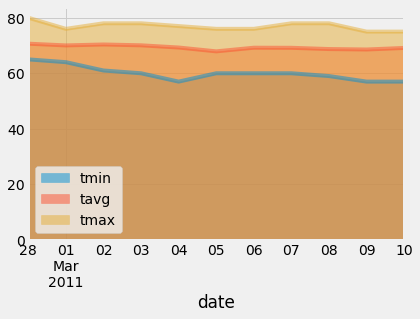

In [93]:
# Plot the daily normals as an area plot with `stacked=False`

df_normals.plot(kind='area', stacked=False)